In [79]:
%matplotlib inline
import pandas as pd

In [80]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [81]:
titles = pd.read_csv('data/titles.csv', index_col=None, encoding = 'utf-8')
titles.head()

,title,year
0,Casa di piacere,1989
1,Nyaay Dansh,1989
2,Malice@Doll,2004
3,Le voleur,1933
4,Le berceau de cristal,1976


In [82]:
cast = pd.read_csv('data/cast.csv', index_col=None,encoding = 'utf-8')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [83]:
superman_batman = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')].groupby(['year','character']).size().unstack().fillna(0)
len(superman_batman[superman_batman['Superman'] - superman_batman['Batman'] > 0])

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [84]:
len(superman_batman[superman_batman['Superman'] - superman_batman['Batman'] < 0])

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

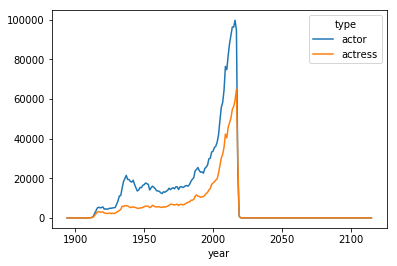

In [85]:
cast.groupby(['year','type']).size().unstack().fillna(0).plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

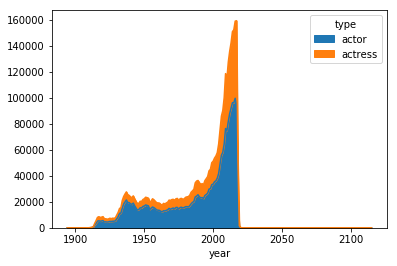

In [86]:
cast.groupby(['year','type']).size().unstack().fillna(0).plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [87]:
actor_actress = cast.groupby(['year','type']).size().unstack().fillna(0)

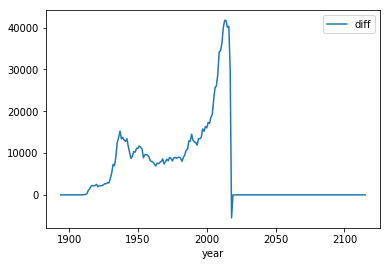

In [88]:
actor_actress['diff']  = actor_actress['actor'] - actor_actress['actress']
actor_actress.plot( y = 'diff')

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

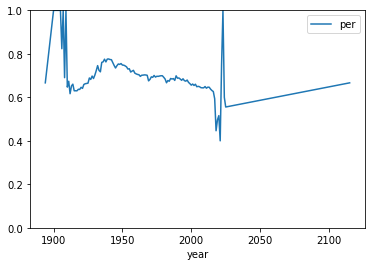

In [89]:
aa = cast.groupby(['year','type']).size().unstack().fillna(0)
aa['per']=aa['actor']/(aa['actor'] + actor_actress['actress'])
aa.plot(y='per',ylim = [0,1])

In [90]:
aa

type,actor,actress,per
year,,,
1894,2.0,1.0,0.666667
1900,2.0,0.0,1.000000
1905,1.0,0.0,1.000000
1906,14.0,3.0,0.823529
1907,5.0,0.0,1.000000
1908,29.0,13.0,0.690476
1909,3.0,0.0,1.000000
1910,44.0,24.0,0.647059
1911,124.0,60.0,0.673913


### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

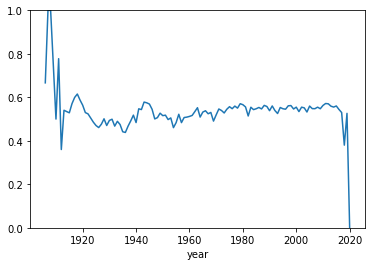

In [91]:
sup = cast[cast['n'] == 2].groupby(['year','type']).size().unstack().fillna(0)
(sup['actor']/(sup['actor'] + sup['actress'])).plot(ylim = [0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

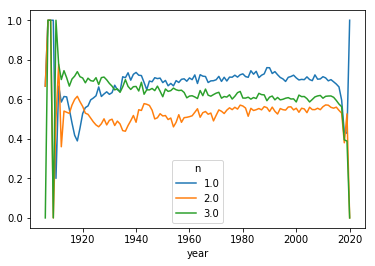

In [92]:
sup_3 = cast[cast['n'] <= 3].groupby(['year','type','n']).size().unstack('type').fillna(0)
sup_3['per'] = sup_3['actor']/(sup_3['actor'] + sup_3['actress'])
sup_3['per'].unstack('n').fillna(0).plot()